In [2]:
#Load some modules etc
%matplotlib inline
import matplotlib.pyplot as plt
from cycler import cycler

from sympy import *
from sympy.stats import *
import scipy as sc
import numpy as np
init_printing()

# Exponential Growth

In [3]:
#Exponential growth
t,r = var("t,r")
C = Function('C')(t)

ur,sr = var("\mu_r,\sigma_r")

LHS = C.diff(t)
RHS = C*r
sol = dsolve(Eq(LHS,RHS))

C0 = C.subs({t:0})
C1 = sol.args[1].args[0]

#at t = 0
C1_sol = solve(sol.subs({t:0,C:C0}),C1)[0]
sol_eq = sol.subs({C1:C1_sol})
sol_eq

# Logistic Growth

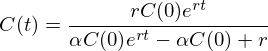

In [4]:
#with intraspecifc
a = var("alpha")
LHS = C.diff(t)
RHS = C*(r - a*C)
sol = dsolve(Eq(LHS,RHS))
C1_sol = solve(sol.subs({t:0}),C1)[0]
f = simplify(sol.subs({C1:C1_sol}))
f

# Taylor Approximations of Moments
## Mean

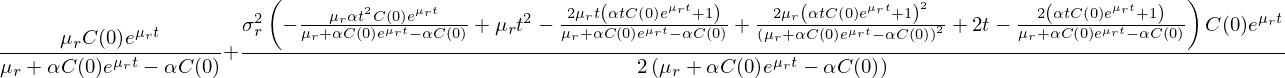

In [11]:
mean = f.args[1].subs({r:ur}) + (sr**2)/2 * f.args[1].diff(r,r).subs({r:ur})
mean

## Varience

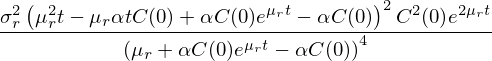

In [6]:
varience = simplify(sr**2 * (f.args[1].diff(r).subs({r:ur}))**2)
varience

# Meanfield Growth

In [28]:
#with interspecifc
p = var("psi")
uC = Function("\mu")(t)
RHS = C*(r-C*a-p*uC)
RHS

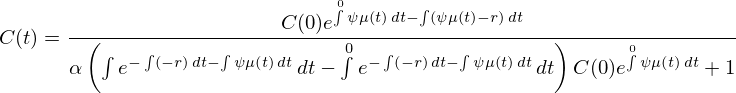

In [29]:
LHS = C.diff(t)
sol = dsolve(Eq(LHS,RHS))
C1_sol = solve(sol.subs({t:0}),C1)[0]
f = simplify(sol.subs({C1:C1_sol}))
f

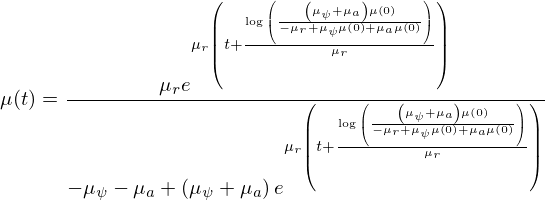

In [55]:
#solve mean
ur,sr = var("\mu_r,\sigma_r")
ua,sa = var("\mu_{a},\sigma_{a}")
up,sp = var("\mu_{\psi},\sigma_{\psi}")
LHS = uC.diff(t)

sol = dsolve(Eq(LHS,RHS.subs({C:uC,r:ur,a:ua,p:up})))
C1_sol = solve(sol.subs({t:0}),C1)[0]
sol_uC = sol.subs({C1:C1_sol})
sol_uC

In [59]:
C_sol = dsolve(Eq(C.diff(t),RHS.subs({uC:sol_uC.args[1]})))
C1_sol = solve(C_sol.subs({t:0}),C1)[0]
C_sol = C_sol.subs({C1:C1_sol})

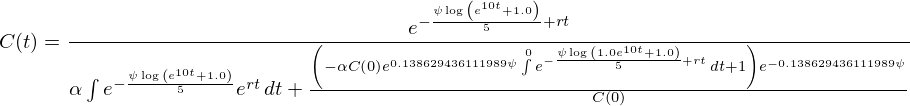

In [62]:
C_sol.subs({ur:10,ua:5,up:0,uC.subs({t:0}):1.0})

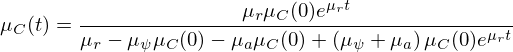

In [31]:
#solve mean
ur,sr = var("\mu_r,\sigma_r")
ua,sa = var("\mu_{a},\sigma_{a}")
up,sp = var("\mu_{\psi},\sigma_{\psi}")

LHS = uC.diff(t)
RHS_mean = RHS.subs({C:uC}).subs({r:ur,a:ua,p:up})
sol = dsolve(Eq(LHS,RHS_mean))
C1_sol = solve(sol.subs({t:0}),C1)[0]
f = simplify(sol.subs({C1:C1_sol}))
f

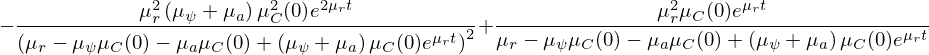

In [36]:
diff(f.args[],t)

In [32]:
RHS_mean

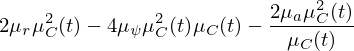

In [466]:
RHS_2nd.subs({uC_3:uC_2/uC})

In [458]:
eq = (Eq(uC.diff(t),RHS_mean),Eq(uC_2.diff(t),RHS_2nd))

TypeError: 'Equality' object is not iterable

In [153]:
#Var
vC = Function("Var(C)")(t)
LHS = vC.diff(t)
RHS_var = (sr**2 * RHS.diff(r)**2 + sa**2 * RHS.diff(a)**2 + sp**2 * RHS.diff(p)**2).subs({C:uC})
# dsolve(Eq(LHS,RHS_var.subs({uC:f.args[1]})))


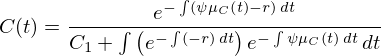

In [188]:
LHS = C.diff(t)
sol = dsolve(Eq(LHS,RHS))
sol

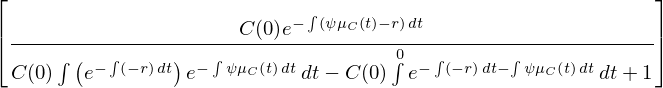

In [193]:
C1_sol = solve(sol.subs({t:0}),C1)[0]
solve(sol.subs({C1:C1_sol,C0:uC.subs({t:0}),C:uC}),uC)

In [181]:
sol_real = simplify(sol.subs({C1:C1_sol}))

In [59]:
f = dsolve(Eq(C.diff(t),uC*C))
f.args[1].subs({C1:solve(f,C1)[0]})

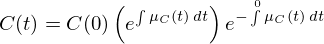

In [63]:
g = f.subs({C1:solve(f.subs({t:0}),C1)[0]})
g

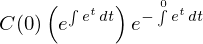

In [73]:
g.subs({uC:exp(t)}).args[1]

In [76]:
integrate(exp(t),t)

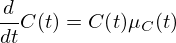

In [43]:
f = uC*C
Eq(C.diff(t),f)

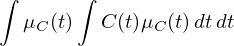

%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

# Liebniz's Rule
We can obtain expresions for the change in moments over time by using differention under the integral sign. 

If we have a system described by:
$$
\frac{dC}{dt} = f(C(t),\theta)
$$

where $\theta$ is a random variable with probabilty distribution function $p_{\theta}(\theta)$. We want to obtain the change in the expectation of this value which is given by:

$$
\frac{dE[C(t)]}{dt} = \frac{d}{dt} \int C(t) p_C(C(t)) dC(t)
$$

We can express the $E[C(t)]$ in terms of the parameter $\theta$ by recalling that

$$
E[g(x)] = \int g(x) p_X(x) dx \\
$$

and rearanging the first equation above

$$
g(\theta) = \int f(C(t),\theta) dt = C(t)
$$

which if we combine gives us

\begin{align}
\frac{dE[C(t)]}{dt} &= \frac{d}{dt} \int p_{\theta}(\theta) g(\theta) \ d\theta \\
                    &= \frac{d}{dt} \int p_{\theta}(\theta) \int f(C(t),\theta) \ dt \ d\theta \\
                    &= \int p_{\theta}(\theta) f(C(t),\theta) d\theta \\
                    &= E[f(C(t),\theta)]
\end{align}

So the change in the mean is given by the expextation across the parameters of the growth equation.

In [57]:
RHS.subs()

ValueError: subs accepts either 1 or 2 arguments

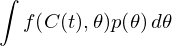

In [58]:
#Testing liebniz rule
#1st moment
#parameters r and t
O,t = var("theta,t")
#State variable C
C = Function("C")(t)
#diff function r -> dC
f = Function("f")(C,O)
g = Function("g")(O)
#probabilty distribution
pC = Function("p")(C)
p = Function("p")(O)


duC = diff(integrate(integrate(f,t)*p,O),t)
duC

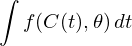

In [38]:
integrate(f,t)

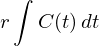

In [43]:
integrate(r*C,t)

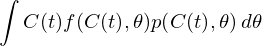

In [595]:
pCO = Function("p")(C,O)
duC.subs({p:integrate(pCO,C)})

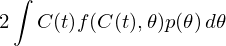

In [520]:
#2nd moment
g = integrate(diff(C**2,t).subs({C.diff(t):f}),t)
duC2 = diff(integrate(g*p,O),t)
duC2

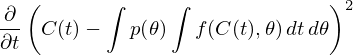

In [523]:
Derivative((C-integrate(integrate(f,t)*p,O))**2,t)

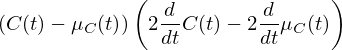

In [497]:
g = Function('g')(C,O)
uC2 = Function("\mu_{C_2}")(t)
v = (C - uC)**2
LHS = diff(v,t)
LHS

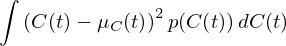

In [496]:
Integral(v*pC,C)

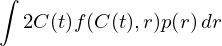

In [385]:
#second moment
pC = Function("p_C")(C)

diff(Integral(p*Integral(2*C*f,t),r),t)

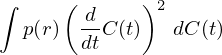

In [395]:
Integral(C.diff(t)**2 * p,C)

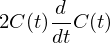

In [354]:
(C**2).diff(t)

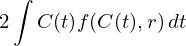

In [348]:
integrate(2*C*f,t)

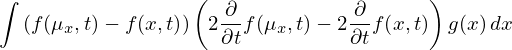

In [238]:
ux = var("\mu_x")
Vx = integrate(g*(f - f.subs({x:ux}))**2,x)
diff(Vx,t)

In [22]:
C = Function("/mu_C")(t)
uC = Function("/mu_C")(t)